<a href="https://colab.research.google.com/github/Murcha1990/ML_AI24/blob/main/Hometasks/Pro/AI_HW1_Regression_with_inference_pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TODO:
- вернуть ссылки на гитхаб
- раскомменитть дашбоард
- в задании 7 выводы
- доп виз после 10 задания
- 23 выводы
- 24 выводы

# **Домашнее задание №1 (pro)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

> Оценка за домашку = $min(\text{ваш балл}, 11)$

**Мягкий дедлайн: 27 ноября 23:59**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**



**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import random
import seaborn as sns
import re

random.seed(42)
np.random.seed(42)

pd.set_option('display.max_rows', 20)

### **Задание 0**
Для чего фиксируем сиды в домашках?

> Для воспроизводимости результатов. Для каждого конкретного сида последовательность генерируемых случайных чисел (которые используются в алгоритмах) будет одинакова.

# **Часть 1 | EDA**


Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (1.7 балла)
- Визуализации признаков и их анализ (1.6 балл)

Всего можно набрать 3.3 основных балла и 0.25 бонусных.

В следующих частях, вы увидите бонусные задания. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (1.7 балла)**

In [135]:
df_train = pd.read_csv('cars_train.csv')
df_test = pd.read_csv('cars_test.csv')

# df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
# df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1.(0.4 балла)**
Выполните операции, направленные на базовое исследование данных:

- [x] Посмотрите, есть ли в датасете пропуски и дубликаты. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [x] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)
- [x] Постройте дашборд в одну строку, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)
- [x] Опишите базовые выводы (какие — выберите сами), используя дашборд (0.2 балла)

Проверим, есть ли пропуски в каких-то колонках:

In [136]:
def print_na(df):
    return 'нет пропусков' if not df.isna().any().any() else 'есть пропуски'

print('В трейне', print_na(df_train))
print('В тесте', print_na(df_test))

В трейне есть пропуски
В тесте есть пропуски


Пропуски есть. Посмотрим, в каких именно колонках:

In [137]:
def print_na_cols(df):
    return ', '.join(df.columns[df.isna().any()])

print('Колонки с пропусками в трейне:', print_na_cols(df_train))
print('Колонки с пропусками в тесте:', print_na_cols(df_test))

Колонки с пропусками в трейне: mileage, engine, max_power, torque, seats
Колонки с пропусками в тесте: mileage, engine, max_power, torque, seats


И в трейне, и в тесте один и тот же набор колонок с пропусками. Проверим наличие полных дубликатов:

In [138]:
def print_dups(df):
    dups = df.duplicated().sum()
    return f'есть дубликаты ({dups} строк)' if dups > 0 else 'нет дубликатов'

print('В трейне', print_dups(df_train))
print('В тесте', print_dups(df_test))

В трейне есть дубликаты (985 строк)
В тесте есть дубликаты (62 строк)


Построим дашборд:

<a id="dashboard"></a>

In [139]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df_train)
#profile.to_notebook_iframe()
#profile.to_file('ydata.html')


**Выводы:**
- Большой дисбаланс категорий в признаке `seller_type` - тип `Individual` составляет 83.2% всех значений признака
- Большинство машин с автоматической коробкой передач
- Большинство машин продается после первого владельца
- Самый большой процент пропущенных значений в признаках `mileage` (2.9%), `engine` (2.9%), `torque` (2.9%), `seats` (2.9%), `max_power` (2.8%)

### **Задание 2 (0.2 балла)**
Проанализируйте статистики датасета.

**Ваша задача:**
- [x] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [x] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [x] Сравните среднее и медиану внутри `train`, внутри `test` и между собой. О чём могут говорить результаты?

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

Статистики по числовым столбцам для трейна:

In [140]:
df_train.describe(include='number')

,year,selling_price,km_driven,seats
count,6999.000000,6.999000e+03,6.999000e+03,6797.000000
mean,2013.818403,6.395152e+05,6.958462e+04,5.419008
std,4.053095,8.089419e+05,5.772400e+04,0.965767
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.700000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


Статистики по числовым столбцам для теста:

In [141]:
df_test.describe(include='number')

,year,selling_price,km_driven,seats
count,1000.000000,1.000000e+03,1000.000000,981.000000
mean,2013.681000,6.179010e+05,71393.341000,5.410805
std,4.012149,7.585539e+05,48486.218662,0.919985
min,1995.000000,3.100000e+04,1303.000000,4.000000
25%,2011.000000,2.500000e+05,37000.000000,5.000000
50%,2014.000000,4.349990e+05,61500.000000,5.000000
75%,2017.000000,6.700000e+05,100000.000000,5.000000
max,2020.000000,6.000000e+06,375000.000000,9.000000


Статистики по категориальным столбцам для трейна:

In [142]:
df_train.describe(include='object')

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,6999,6999,6999,6999,6999,6797,6797,6803,6796
unique,1924,4,3,2,5,386,120,316,419
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm
freq,116,3793,5826,6095,4587,197,885,330,468


Статистики по категориальным столбцам для теста:

In [143]:
df_test.describe(include='object')

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,1000,1000,1000,1000,1000,981,981,981,981
unique,621,4,3,2,5,237,88,182,226
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm
freq,15,534,837,877,623,23,116,43,57


Сравним среднее и медиану в трейне и тесте:

In [144]:
def median_mean_describe(df):
    tmp = df.describe(include='number').loc[['mean', '50%']]
    return pd.concat([tmp, tmp.pct_change().iloc[[1]].reset_index(drop=True)])

display(median_mean_describe(df_train))
display(median_mean_describe(df_test))

,year,selling_price,km_driven,seats
mean,2013.818403,639515.197171,69584.615517,5.419008
50%,2015.000000,450000.000000,60000.000000,5.000000
0,0.000587,-0.296342,-0.137740,-0.077322


,year,selling_price,km_driven,seats
mean,2013.681000,617901.042000,71393.341000,5.410805
50%,2014.000000,434999.000000,61500.000000,5.000000
0,0.000158,-0.296005,-0.138575,-0.075923


Можно заметить, что и в трейне, и в тесте процент отклонения среднего от медианы для одних и тех же колонок практически не отличается. Это говорит о том, что датасеты были хорошо разбиты, с сохранением распределения признаков. Поэтому можно предположить, что модель, обученная на трейне, будет адекватно вести себя и на тесте.

### **Задание 3 (0.2 балла)**

- [x] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.05 балла)
- [x] Отобразите такие объекты (0.05 балла)
- [x] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.05 балла)
- [x]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.05 балла)

Определим количество объектов в трейне с одинаковым признаковым описанием с исключенной целевой переменной `selling_price`:

In [145]:
TARGET = 'selling_price'

In [146]:
dups = df_train.drop([TARGET], axis=1).duplicated()
print('Число дубликатов:', dups.sum())

Число дубликатов: 1159


Отобразим эти объекты:

In [147]:
df_train[df_train.drop([TARGET], axis=1).duplicated()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
254,Hyundai Grand i10 Sportz,2017,450000,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
258,Maruti Swift VXI,2012,330000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
268,Maruti Swift Dzire VXI,2014,400000,70000,Petrol,Individual,Manual,Second Owner,19.1 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
324,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,2625000,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
325,Lexus ES 300h,2019,5150000,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6947,Chevrolet Spark 1.0 LS,2010,140000,60000,Petrol,Individual,Manual,Second Owner,18.0 kmpl,995 CC,62 bhp,90.3Nm@ 4200rpm,5.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,746000,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6989,Maruti Swift Dzire VDI,2015,625000,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


Удалим дубликаты по всем колонкам, кроме таргета, оставляя первый из дубликатов, а также обновим индексы:

In [148]:
subset_cols = df_train.columns.difference([TARGET])
df_train.drop_duplicates(subset_cols, keep='first', inplace=True)
df_train.reset_index(drop=True, inplace=True)

In [149]:
assert df_train.shape == (5840, 13)

### **Задание 4 (0.3 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [x] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [x] Приведите тип данных к ``float``.
* [x] Предобработайте признак `torque` — разделите его на два: собственно `torque` и `max_torque_rpm`. Учтите единицы измерения


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.

Можно заметить, что в признаке `mileage` разные единицы измерения:

In [150]:
df_train.mileage.str.replace(r'.*\s', '', regex=True).unique()

array(['kmpl', 'km/kg', nan], dtype=object)

`km/kg` можно перевести в `kmpl`, умножив на 1.2 .. 1.4 в зависимости от плотности топлива. Умножим на 1.3.

В признаке `torque` единицы `kgm` переведем в `Nm`, умножив на 9.80665. Также может быть указан диапазон оборотов, будем использовать среднее значение в этом случае.

В признаках `engine`, `max_power` единицы измерения одинаковые (есть неуказанные, но будем считать для простоты, что все одинаковые).

In [151]:
from pandas.api.types import is_numeric_dtype

# преобразование единиц измерения и значений во float
def fix_features(df):
    # преобразование признака mileage
    def _kmkg2kmpl(value):
        if isinstance(value, str):
            parts = value.split()
            parts[0] = float(parts[0])
            if parts[1] == 'km/kg':
                parts[0] *= 1.3
            return parts[0]
        return value
    
    # преобразование крутящего момента
    def _moment(value: str):
        if 'nm' in value:
            return float(value[:value.index('nm')])
        if 'kgm' in value:
            return float(value.replace('kgm', '')) * 9.80665
        if '(' in value:
            return float(value.split('(')[0])
        return float(value)

    # преобразование оборотов
    def _rpm(value: str):
        value = value.replace(',', '').replace('~', '-').strip()
        value = re.sub(r"\+/-.+", '', value)
        value = re.sub(r"\D*$", '', value)
        if '-' in value:
            parts = list(map(float, value.split('-')))
            return (parts[0] + parts[1]) / 2
        return float(value) if len(value) != 0 else np.nan

    # разбиение колонки torque на две с преобразованием
    def _torque(value: str):
        if pd.isnull(value):
            return [np.nan, np.nan]
        
        value = value.strip().lower()
        if value == '':
            return [np.nan, np.nan]
        
        parts = []
        if '@' in value:
            parts = value.split('@', 2)
        elif 'at' in value:
            parts = value.split('at')
        elif '/' in value:
            parts = value.split('/')

        if len(parts) != 0:
            return [_moment(parts[0]), _rpm(parts[1])]
        
        return [_moment(value), np.nan]

    
    if not is_numeric_dtype(df.mileage.dtype):
        df['mileage'] = df.mileage.apply(_kmkg2kmpl)
    
    if not is_numeric_dtype(df.engine.dtype):
        df['engine'] = df.engine.str.replace(r'\s.*', '', regex=True).replace('', np.nan).astype('float')
    
    if not is_numeric_dtype(df.max_power.dtype):
        df['max_power'] = df.max_power.str.replace(r'\s.*', '', regex=True).replace('', np.nan).astype('float')
    
    if 'rpm' not in df.columns:
        tmp = pd.DataFrame(df.torque.apply(_torque).to_list(), columns=['torque', 'max_torque_rpm'])
        df = pd.concat([df.drop(['torque'], axis=1), tmp], axis=1)

    return df
        

In [152]:
df_train = fix_features(df_train)
df_test = fix_features(df_test)

In [153]:
df_train[['mileage', 'engine', 'max_power', 'torque', 'max_torque_rpm']].head()

,mileage,engine,max_power,torque,max_torque_rpm
0,23.40,1248.0,74.00,190.00000,2000.0
1,21.14,1498.0,103.52,250.00000,2000.0
2,23.00,1396.0,90.00,219.66896,2250.0
3,16.10,1298.0,88.20,11.50000,4500.0
4,20.14,1197.0,81.86,113.75000,4000.0


### **Задание 5 (0.3 балла)**

На первом шаге мы обнаружили пропуски. Давайте избавимся от них.

**Задание:**
- [x] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось.
- [x] Почему стоит применять именно медиану. Могли ли мы применить среднее? Обоснуйте свое рассуждение.
- [x] Как правильно считать медиану для заполнения? Выберите верное утверждение:
    - [x] По тестовым свою, по тренировочным — свою
    - [x] По тренировочным данным для `train` и `test`






- Если данные нормально распределены и отсутствуют выбросы, то применять среднее для заполнения можно. В нашем же случае признаки в основном скошены, выглядит нормальным только признак `mileage`. Поэтому нужно использовать медиану, которая дает лучшую оценку центра такого распределения. Вторая причина - медиана менее чувствительна к выбросам.
- Для заполнения пропуска в тесте необходимо использовать медиану тренировочной выборки, иначе мы получим утечку данных, что преведет к смещению оценок модели.

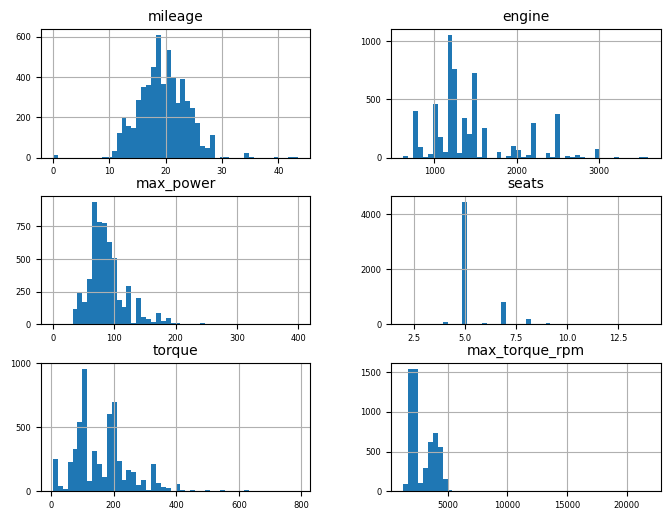

In [154]:
cols = df_train.columns[df_train.isna().any()]

rcParams.update({'axes.titlesize': 10})
df_train[cols].hist(bins=50, xlabelsize=6, ylabelsize=6, figsize=(8, 6));

In [155]:
medians = df_train[cols].median()
df_train[cols] = df_train[cols].fillna(medians)
df_test[cols] = df_test[cols].fillna(medians)

Убедимся, что не осталось пропусков:

In [156]:
df_train.isna().any().any(), df_test.isna().any().any()

(np.False_, np.False_)

### **Задание 6 (0.2 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [x] Осуществите приведение столбцов к необходимому типу.
- [x] Ответье на вопрос — почему (хоть мы этого и не делаем) ``seats``, возможно рассмотреть как категориальную переменную?

In [157]:
def fix_engine_seats(df):
    df['engine'] = df.engine.astype('int')
    df['seats'] = df.seats.astype('int')

fix_engine_seats(df_train)
fix_engine_seats(df_test)

> `seats` можно рассматривать как категориальную переменную, поскольку число число мест в машинах образует конечное множество с небольшой мощностью:

In [158]:
len(df_train.seats.unique())

9

### **Задание 7 (0.1 балла)**

Снова вызовите метод describe и проанализируйте статистики.

**Ответье на вопрос:**
- [x] Есть ли основания предполагать, что заполнение пропусков свдинуло наши распределения? Могло ли это вообще возникнуть?

In [159]:
df_train.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats,torque,max_torque_rpm
count,5840.000000,5.840000e+03,5.840000e+03,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000
mean,2013.428425,5.229601e+05,7.395224e+04,19.518301,1429.448973,87.906371,5.426712,163.590103,2849.274914
std,4.095622,5.354320e+05,6.007114e+04,4.144945,485.662834,31.640418,0.982344,89.674071,973.806631
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,0.000000,2.000000,5.700000,1300.000000
25%,2011.000000,2.500000e+05,3.900000e+04,17.000000,1197.000000,68.000000,5.000000,102.000000,2000.000000
50%,2014.000000,4.050000e+05,7.000000e+04,19.400000,1248.000000,81.860000,5.000000,153.000000,2400.000000
75%,2017.000000,6.400000e+05,1.000000e+05,22.320000,1498.000000,99.000000,5.000000,200.000000,3750.000000
max,2020.000000,1.000000e+07,2.360457e+06,43.472000,3604.000000,400.000000,14.000000,789.000000,21800.000000


In [160]:
df_test.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats,torque,max_torque_rpm
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2013.681000,6.179010e+05,71393.341000,19.395477,1454.87600,90.841670,5.403000,168.395914,2895.591000
std,4.012149,7.585539e+05,48486.218662,4.040778,521.99574,34.893389,0.912921,93.660860,955.099475
min,1995.000000,3.100000e+04,1303.000000,0.000000,624.00000,34.200000,4.000000,7.800000,1470.000000
25%,2011.000000,2.500000e+05,37000.000000,16.587500,1197.00000,69.000000,5.000000,104.000000,2125.000000
50%,2014.000000,4.349990e+05,61500.000000,19.400000,1248.00000,82.425000,5.000000,153.000000,2400.000000
75%,2017.000000,6.700000e+05,100000.000000,22.320000,1582.00000,102.000000,5.000000,205.000000,4000.000000
max,2020.000000,6.000000e+06,375000.000000,41.938000,3604.00000,280.000000,9.000000,620.000000,5000.000000


> Помимо заполнения пропусков, могло повлиять также удаление дуликатов. Визуально внешний вид распределений, если сравнивать данные с [дашбордом](#dashboard), не изменился, но:
- уменьшились среднее и медиана в `year`, `selling_price`
- увеличились среднее и медиана в `km_driven`
- `seats` - без изменений

> Сдвиг распределений мог бы произойти, если число пропусков было бы велико, или выбран неправильный метод заполнения пропусков

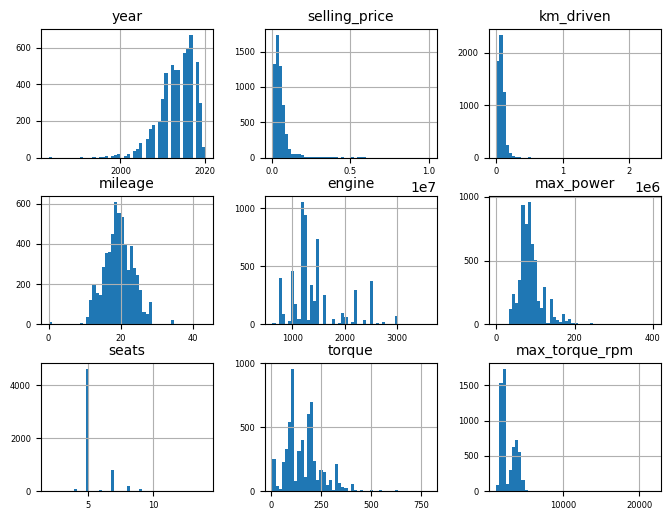

In [161]:
rcParams.update({'axes.titlesize': 10})
df_train.select_dtypes(np.number).hist(bins=50, xlabelsize=6, ylabelsize=6, figsize=(8, 6));

## **Визуализации и корреляция (1.6 балла + 0.25)**

Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 8 (0.5 балла)**

Шаг 1.
- [x] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [x] По полученному графику ответьте на вопросы:
    - [x] Можно ли предположить на основе распределений связь признаков с целевой переменной?
    - [x] Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [x] Постройте pairplot по тестовым данным
- [x] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

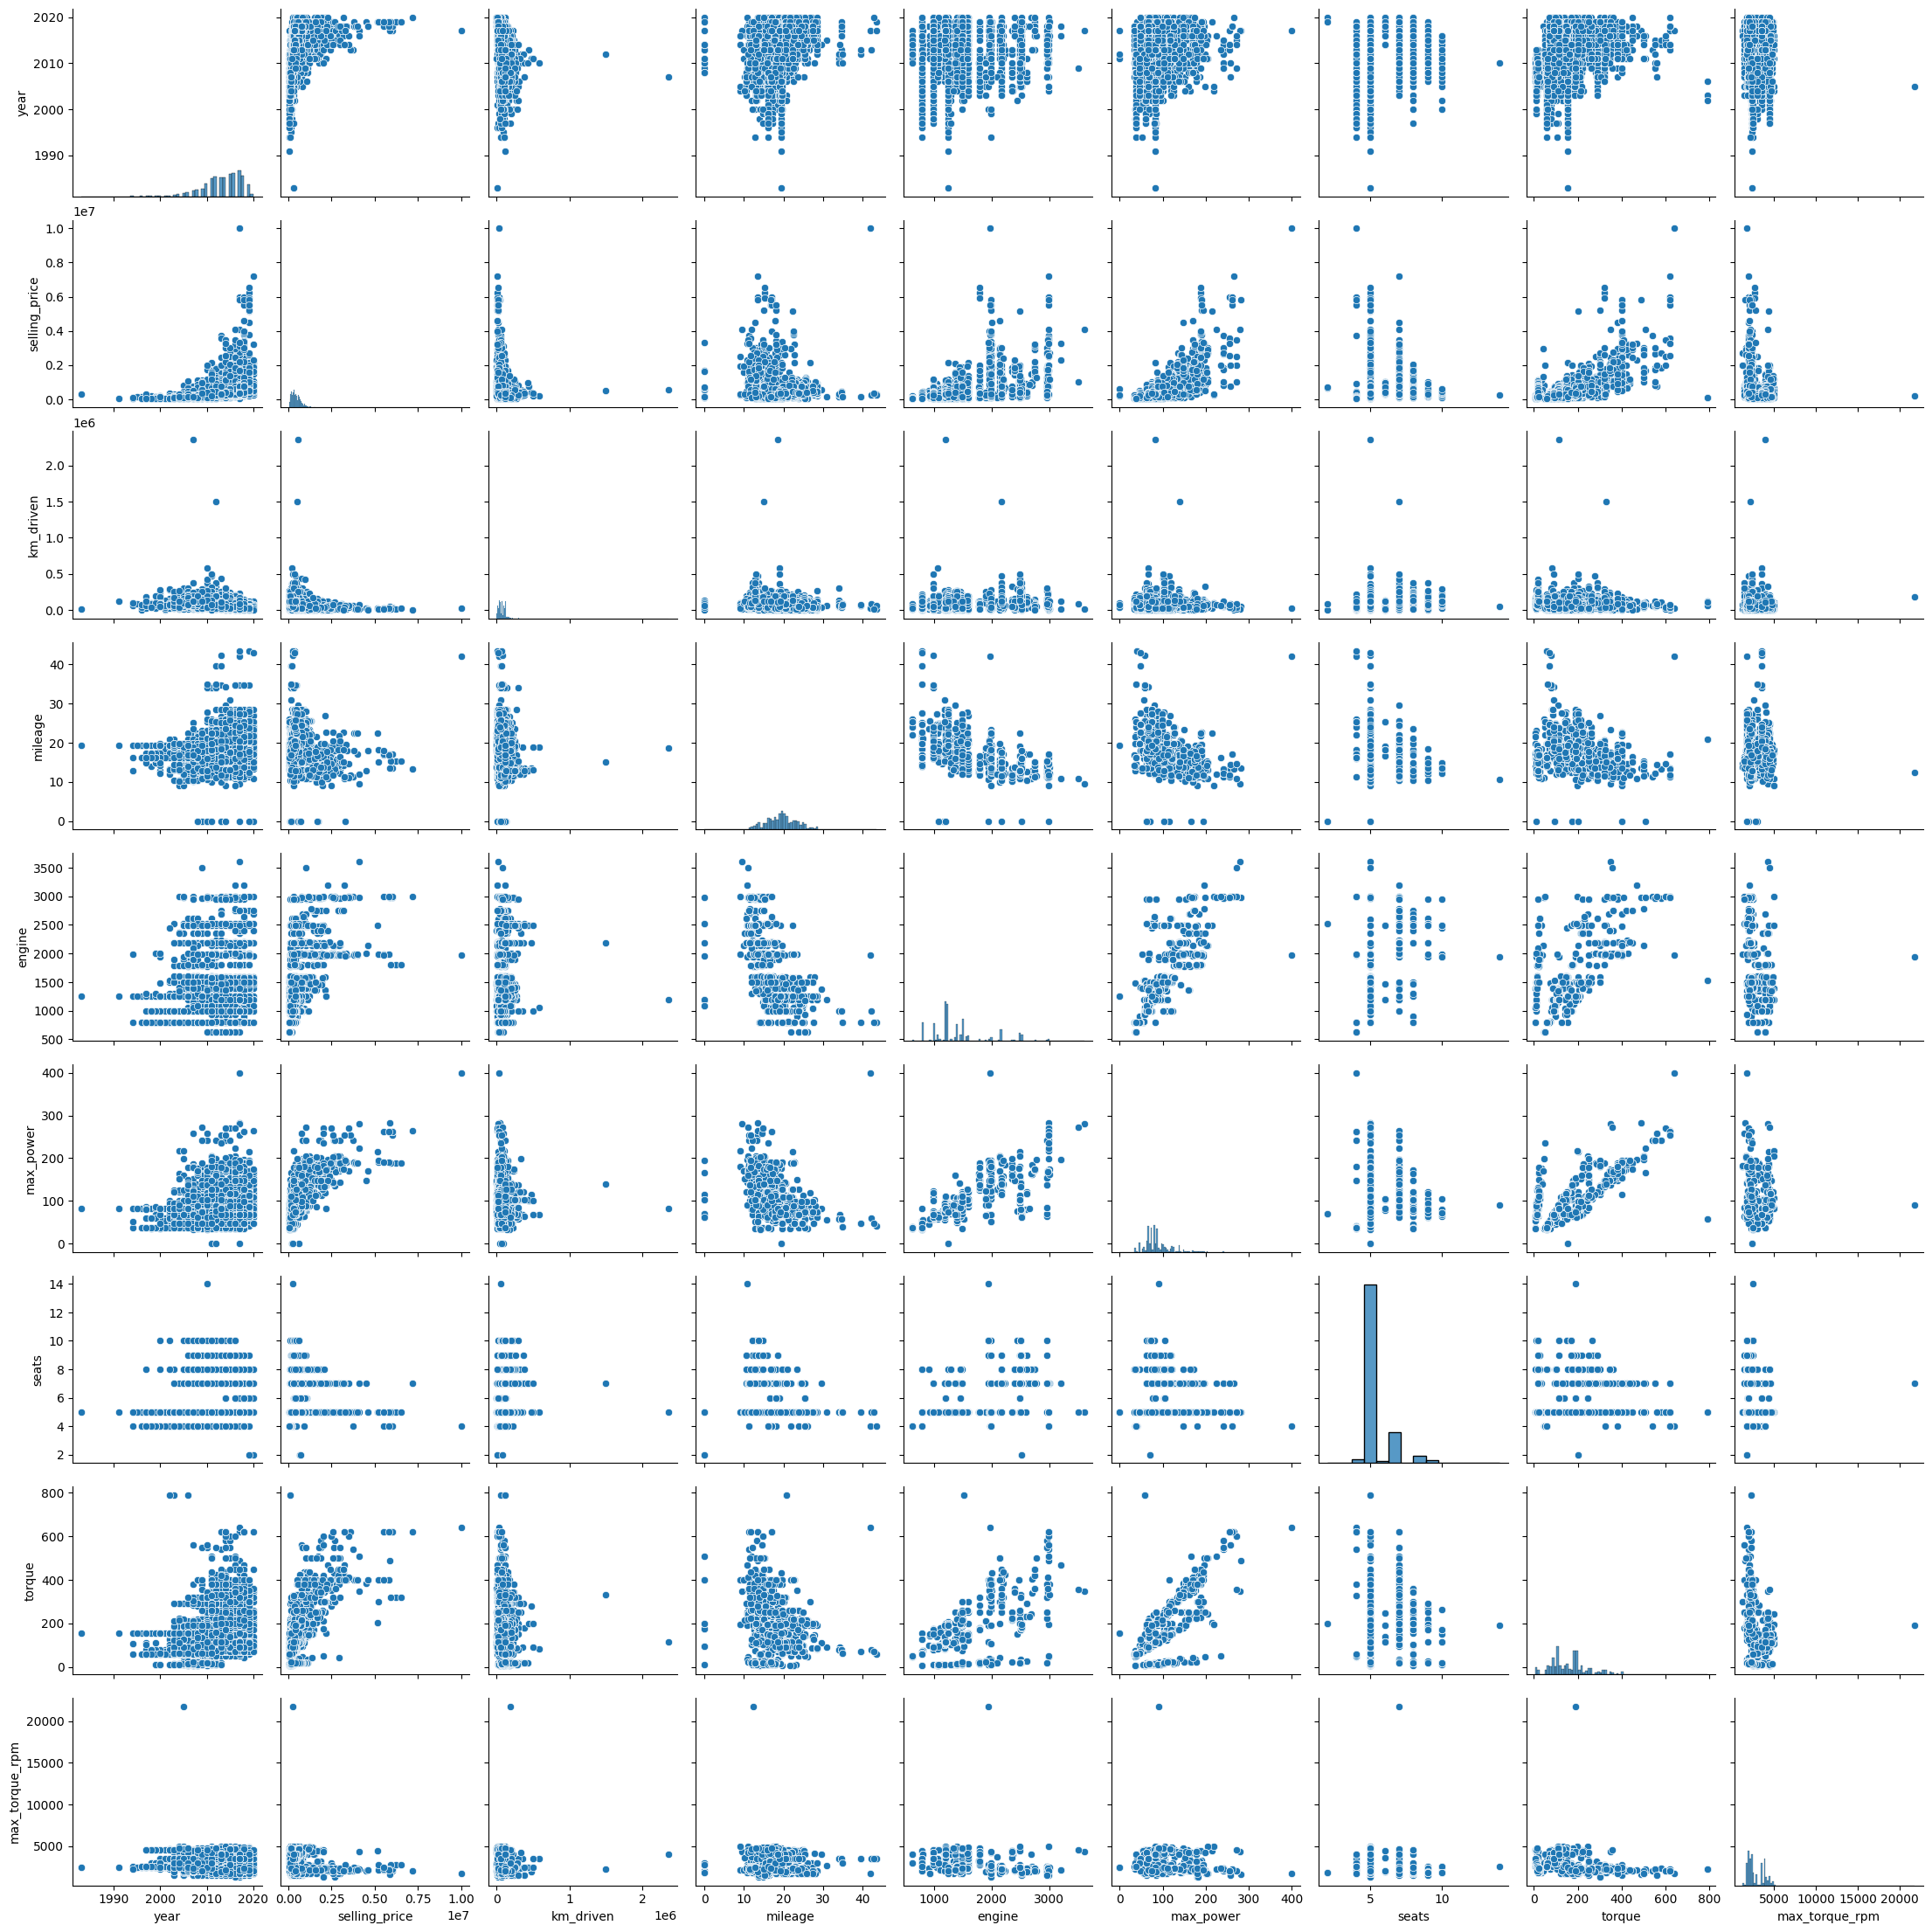

In [162]:
sns.pairplot(df_train)

> Если посмотреть на пары с целевой переменной `selling_price`/`torque`, `selling_price`/`max_power`, то можно наблюдать некоторую линейную зависимость (чем больше крутящий момент, мощность или объем двигателя, тем выше цена). В меньшей степени выражена зависимость у пар `selling_price`/`engine`, `selling_price`/`year` (как будто в этом случае зависимость квадратичная). Поэтому можно предположить корреляцию между указанными признаками и целевой переменной, в остальных случаях явной зависимости не наблюдается.
>
> Кроме того, видна линейность зависимостей между `max_power`/`torque`, `max_power`/`engine`.

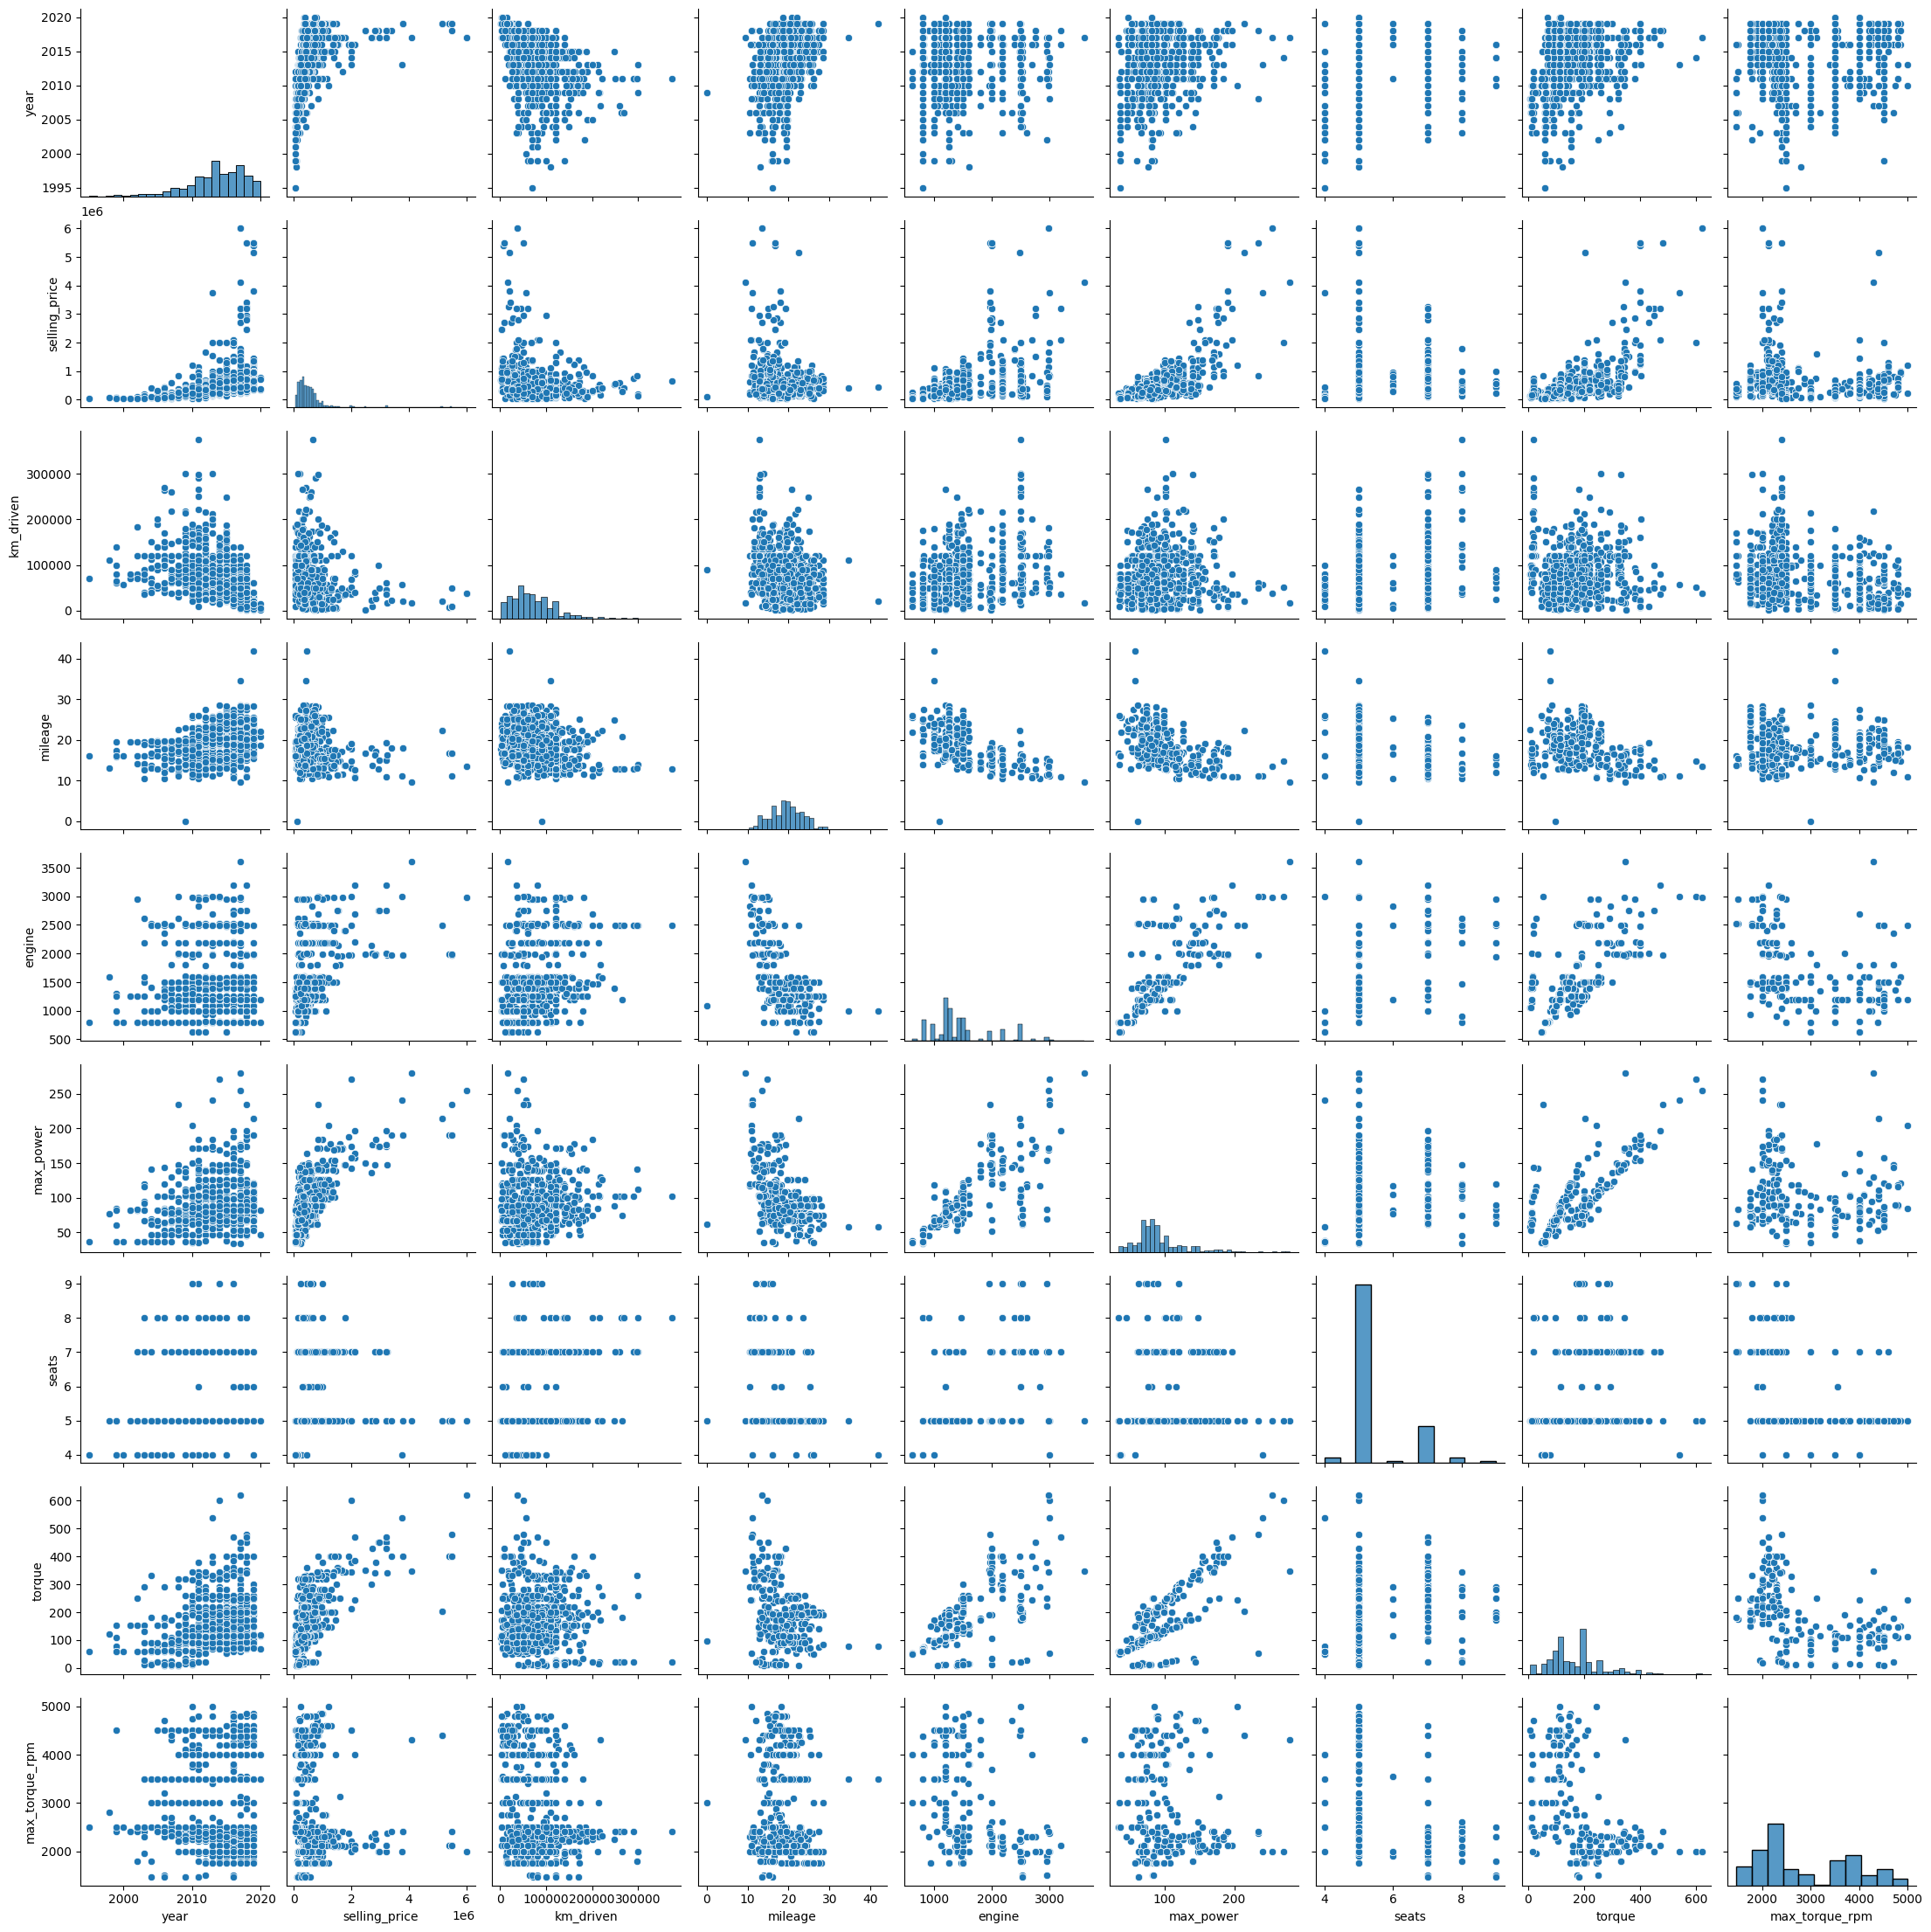

In [163]:
sns.pairplot(df_test)

> Ранее уже отмечалось, что распределения признаков в трейне и тесте похожи. Полученные графики также подтверждают это: наблюдаются похожие зависимости между переменными.

### **Задание 9 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [x] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [x] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)

In [164]:
corr = df_train.select_dtypes(np.number).corr()
corr

,year,selling_price,km_driven,mileage,engine,max_power,seats,torque,max_torque_rpm
year,1.000000,0.427279,-0.368966,0.328988,0.002819,0.156858,0.041178,0.233161,0.032678
selling_price,0.427279,1.000000,-0.164828,-0.110391,0.447672,0.692814,0.149953,0.612198,-0.177878
km_driven,-0.368966,-0.164828,1.000000,-0.175161,0.229766,0.024588,0.192328,0.048861,-0.232456
mileage,0.328988,-0.110391,-0.175161,1.000000,-0.567490,-0.377946,-0.442783,-0.149779,-0.074707
engine,0.002819,0.447672,0.229766,-0.567490,1.000000,0.681117,0.652172,0.618925,-0.385459
max_power,0.156858,0.692814,0.024588,-0.377946,0.681117,1.000000,0.244112,0.758072,-0.156114
seats,0.041178,0.149953,0.192328,-0.442783,0.652172,0.244112,1.000000,0.306240,-0.297322
torque,0.233161,0.612198,0.048861,-0.149779,0.618925,0.758072,0.306240,1.000000,-0.501961
max_torque_rpm,0.032678,-0.177878,-0.232456,-0.074707,-0.385459,-0.156114,-0.297322,-0.501961,1.000000


<Axes: >

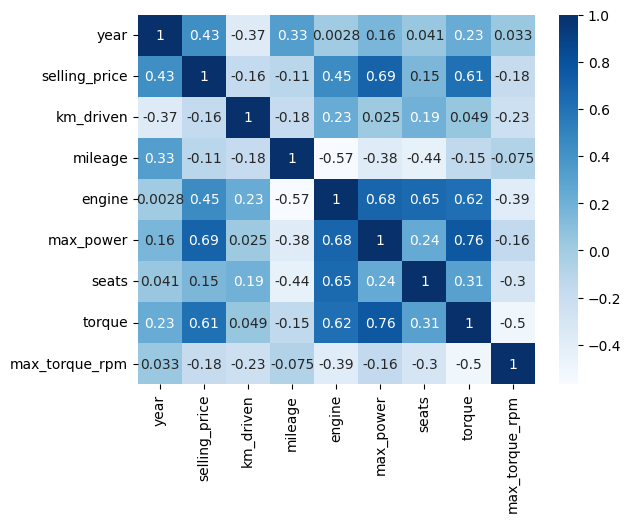

In [165]:
sns.heatmap(corr, cmap='Blues', annot=True)

- [x] Ответьте на вопросы:
    - Какие 2 признака наименее скоррелированы между собой?
    - Между какими наблюдается довольно сильная положительная линейная зависимость?
    - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

- Наименее скоррелированы признаки `year` и `engine` (коэффициент 0.0028)
- Наблюдается сильная положительная зависимость между `torque` и `max_power` (0.76), `selling_price` и `max_power` (0.69), `max_power` и `engine` (0.68)
- Между признаками `year` и `km_driven` есть отрицательная зависимость, поэтому утверждать так имеются основания.

### **Задание 10 (0.6 балла)**

По умолчанию `pd.corr` возвращает корреляцию Пирсона, говорящую о линейной взаимосвязи. Но зависимости существуют не только линейные! В этой задаче, попробуйте измерить другие способы вычисления корреляций.

- [x] Реализуйте корреляцию Спирмена/Кендала (на выбор) без использования библиотек (можно пользоваться только `numpy`). Сравните результаты вычисления с библиотечной реализацией

- [x] Постройте матрицу корреляции [phik](https://pypi.org/project/phik/)
- [x] Проинтерпретируйте результаты


Реализуем вычисление корреляции Кендалла.

Пара наблюдений $(x_1, y_1)$ и $(x_2, y_2)$ называются **согласованными** (concordant), если $x_1 < x_2$ и $y_1 < y_2$ или $x_2 < x_1$ и $y_2 < y_1$. Пара **несогласована** (discordant), если $x_1 < x_2$ и $y_2 < y_1$ или $x_2 < x_1$ и $y_1 < y_2$. Если либо $x_1 = x_2$, либо $y_1 = y_2$, пара не является ни тем, ни другим. Коэффициент корреляции вычисляется по формуле:

$$
\tau_b = \frac{n_c - n_d}{\sqrt{(n_0 - n_1) (n_0 - n_2)}}
$$

где:
- $n_0 = n (n - 1) / 2$
- $n_c$ - число согласованных пар
- $n_d$ - число несогласованных пар
- $n_1 = \sum_i t_i (t_i - 1) / 2$
- $n_2 = \sum_j u_j (u_j - 1) / 2$
- $t_i$ - число равных значений в $i$-й группе (пары группируются по равным значениям в $x$)
- $u_j$ - то же самое для $y$

Эффективный алгоритм ($O(n \log n)$) подсчета числа согласованных/несогласованных пар довольно хитрый, можно посмотреть в [Вики](https://en.wikipedia.org/wiki/Kendall_rank_correlation_coefficient#Algorithms). Вычисление $n_c - n_d$ заменяется на вычисление $n_0 - n_1 - n_2 + n_3 - 2 S(y)$, где:

In [166]:
def kendall(x, y):
    """
    Вычисление корреляции Кендалла между двумя последовательностями чисел x и y.
    Длины последовательностей должны быть равны.
    """
    
    def _sum(n):
        n = int(n)
        return n * (n + 1) // 2
    
    x, y = np.asarray(x, dtype='float'), np.asarray(y, dtype='float')
    if len(x) != len(y):
        raise ValueError("Размеры входных данных отличаются")
    
    n = len(x)
    if n <= 0:
        raise ValueError("Входные массивы должны содержать значения")
    
    n0 = _sum(n - 1)
    pairs = sorted(list(zip(x, y)))

    # пары отсотрированы по первому числу
    # n3 вычисляется как n1 или n2, но с учетом одинаковых значений и x, и y
    # вычислить n1 и n3 довольно просто    

    n1, n3 = 0, 0
    cons_n1, cons_n3 = 1, 1
    prev = pairs[0]

    for i in range(1, n):
        curr = pairs[i]
        if curr[0] == prev[0]:
            cons_n1 += 1
            if curr[1] == prev[1]:
                cons_n3 += 1
            else:
                n3 += _sum(cons_n3 - 1)
                cons_n3 = 1
        else:
            n1 += _sum(cons_n1 - 1)
            cons_n1 = 1
            n3 += _sum(cons_n3 - 1)
            cons_n3 = 1
        prev = curr

    n1 += _sum(cons_n1 - 1)
    n3 += _sum(cons_n3 - 1)

    # далее необходимо посчитать число перестановок Sy,
    # которые необходимы, чтобы отсортировать y.
    # Для этого используется сортировка слиянием.

    Sy, part_size = 0, 1
    pairs_dst = [None for x in range(n)]
    while part_size < n:
        for offset in range(0, n, 2 * part_size):
            i = offset
            iend = min(i + part_size, n)
            j = iend
            jend = min(j + part_size, n)
            copy_loc = offset
            
            while i < iend or j < jend:
                if i < iend:
                    if j < jend:
                        if pairs[i][1] <= pairs[j][1]:
                            pairs_dst[copy_loc] = pairs[i]
                            i += 1
                        else:
                            pairs_dst[copy_loc] = pairs[j]
                            j += 1
                            Sy += iend - i
                    else:
                        pairs_dst[copy_loc] = pairs[i]
                        i += 1
                else:
                    pairs_dst[copy_loc] = pairs[j]
                    j += 1
                copy_loc += 1

        pairs, pairs_dst = pairs_dst, pairs
        part_size *= 2

    n2, cons_n2 = 0, 1
    prev = pairs[0]
    for i in range(1, n):
        curr = pairs[i]
        if curr[1] == prev[1]:
            cons_n2 += 1
        else:
            n2 += _sum(cons_n2 - 1)
            cons_n2 = 1
        prev = curr

    n2 += _sum(cons_n2 - 1)

    pq = n0 - n1 - n2 + n3 - 2 * Sy
    not_tied = float(n0 - n1) * float(n0 - n2)

    return pq / np.sqrt(not_tied)
    

Возьмем значения каких-нибудь двух признаков и сравним с библиотечной реализацией:

In [167]:
from scipy.stats import kendalltau

k1 = kendall(df_train.torque, df_train.max_power)
k2 = kendalltau(df_train.torque, df_train.max_power).statistic

print(f'Ручная реализация: {k1}, библиотечная: {k2}')

Ручная реализация: 0.5656631766911726, библиотечная: 0.5656631766911726


Результаты совпадают.

Построим матрицу корреляции phik:

interval columns not set, guessing: ['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'torque', 'max_torque_rpm']


d:\work\mg-src\ml-hw-01\.venv\Lib\site-packages\phik\data_quality.py:59: UserWarning: The number of unique values of variable name is large: 1924. Are you sure this is not an interval variable? Analysis for pairs of variables including name can be slow.
  warnings.warn(


<Axes: >

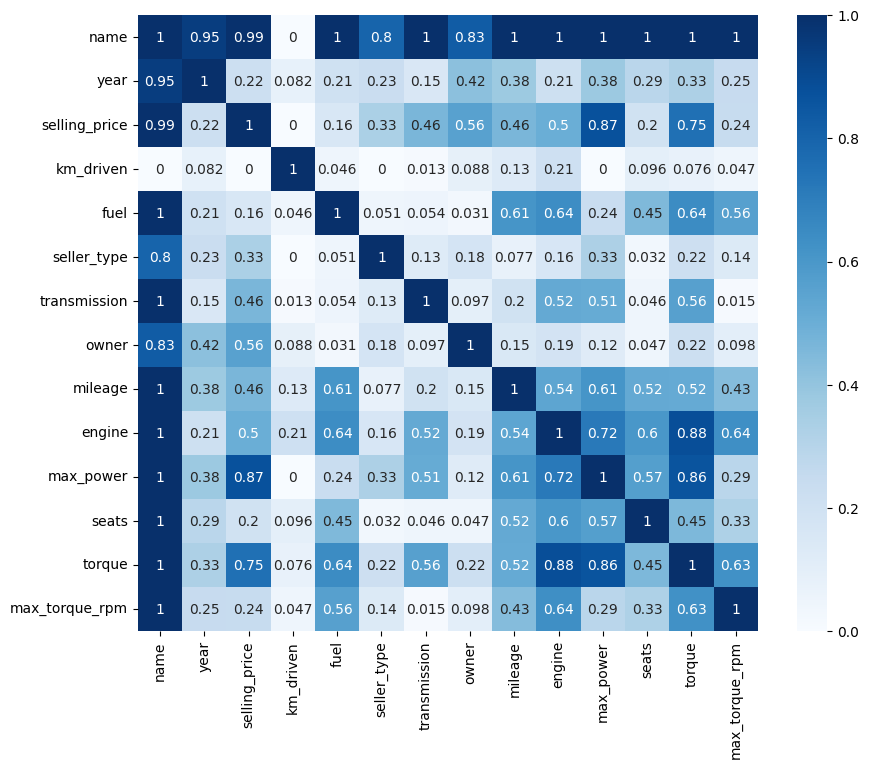

In [168]:
import phik

phik_corr = phik.phik_matrix(df_train)

fig = plt.figure(figsize=(10, 8))
sns.heatmap(phik_corr, cmap='Blues', annot=True)

- Интересно выглядит корреляция `name` с остальными признаками. Можно сделать вывод, что у каждой модели автомобиля уникальные харакеристики (в совокупности).
- Характеристики двигателей (объем, мощность, крутящий момент) достаточно четко взаимосвязаны с типом топлива и типом коробки передач.

### **Дополнительные визуализации (бонус 0.2 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

Хочется еще посмотреть на ящики с усами, чтобы оценить выбросы. Как отмечалось выше, есть довольно много машин с относительно высокой ценой. Является ли это ошибкой - вопрос предметной области, некоторые машины действительно могут столько стоить.

<a id='add_vis'></a>

<Axes: xlabel='selling_price'>

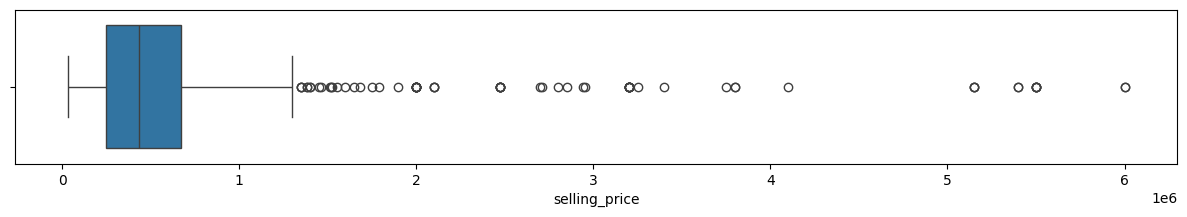

In [169]:
plt.figure(figsize=(15, 2))
sns.boxplot(df_test, x=TARGET)

Также можно видеть выбросы практически во всех числовых признаках, но на первый взгляд, ничего ошибочного в таких значениях нет.

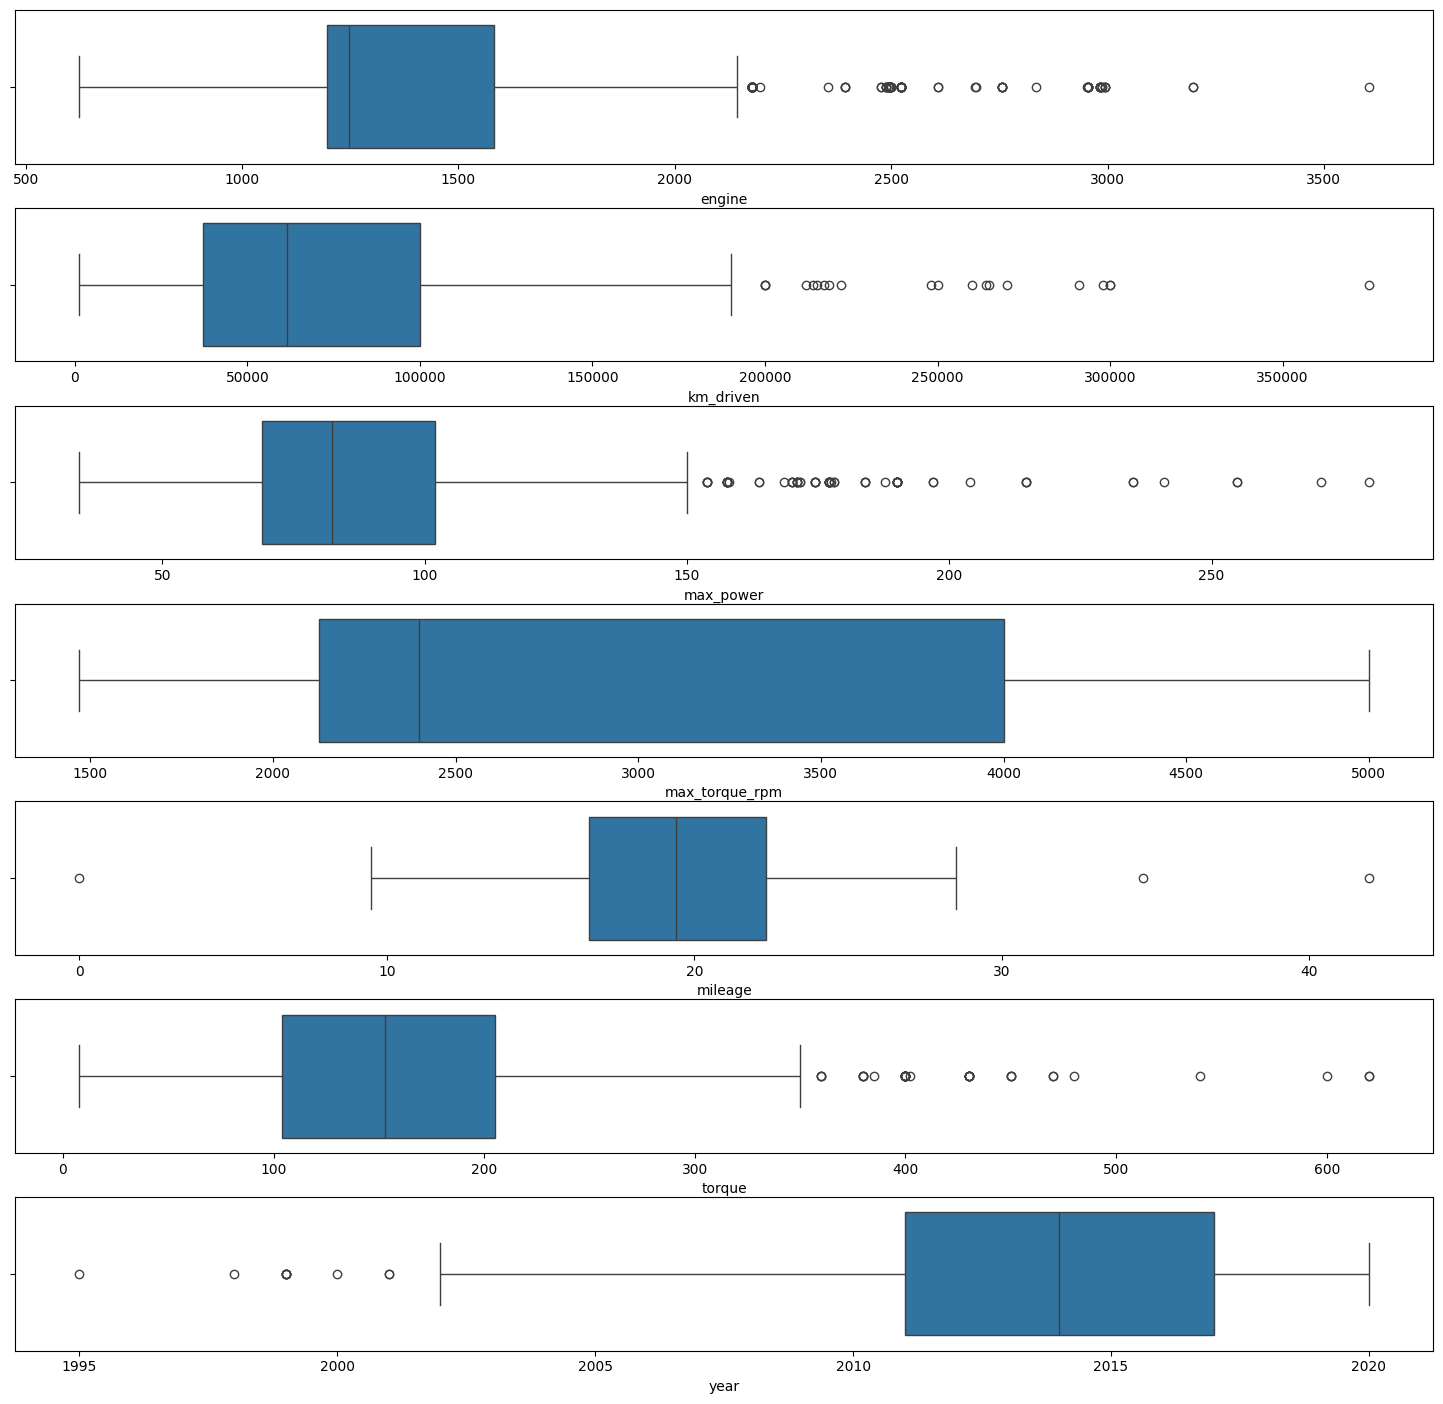

In [170]:
cols = df_train.select_dtypes(np.number).columns.difference([TARGET, 'seats'])

fig = plt.figure(figsize=(15, 2*len(cols)))
axes = fig.subplots(len(cols), 1)
fig.tight_layout()

for col in range(len(cols)):
    sns.boxplot(df_test, x=cols[col], ax=axes[col])


# **Часть 2 (1.7 балла) | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.7 основных и 0.15 бонусных балла;

### **Задание 11 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [46]:
y = df_train.selling_price.copy()
X = df_train.drop([TARGET], axis=1).select_dtypes(np.number)

# данные датасета df_test будем использовать для финальной валидации, когда будем сравнивать модели
y_val = df_test.selling_price.copy()
X_val = df_test.drop([TARGET], axis=1).select_dtypes(np.number)

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1./3, random_state=42)

In [41]:
# закомментарил, т.к. числовых столбцов получилось 8 после всех преобразований. Трейн разбили еще раз, поэтому число строк тоже другое
#assert X_train.shape == (5840, 6)

### **Задание 12. (0.2 балла)**

Построим нашу первую модель!
- [x] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [x] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE, root_mean_squared_error as RMSE
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

model = LinearRegression()
model.fit(X_train, y_train)

ypred_train = model.predict(X_train)
ypred_test = model.predict(X_test)
ypred_val = model.predict(X_val)

print(f'R2 train: {r2_score(y_train, ypred_train)}, R2 test: {r2_score(y_test, ypred_test)}, R2 val: {r2_score(y_val, ypred_val)}')
print(f'MSE train: {MSE(y_train, ypred_train)}, MSE test: {MSE(y_test, ypred_test)}, MSE val: {MSE(y_val, ypred_val)}')
print(f'RMSE train: {RMSE(y_train, ypred_train)}, RMSE test: {RMSE(y_test, ypred_test)}, RMSE val: {RMSE(y_val, ypred_val)}')

R2 train: 0.599666230647941, R2 test: 0.5892164820637809, R2 val: 0.5910916904915935
MSE train: 105823312994.50026, MSE test: 135984793835.60045, MSE val: 235052172943.27527
RMSE train: 325304.95384254487, RMSE test: 368761.16096411296, RMSE val: 484821.7950373882


Сохраним результаты для дальнейших сравнений:

In [43]:
ypreds = {
    'Linear Regression (Задание 12)': ypred_val,
}

Качество модели не очень высокое. Из-за того, что разброс цен велик, RMSE выглядит пугающе). Как уже обсуждалось, значения метрик на трейне и валидации не сильно отличаются, поэтому можно предположить, что эффект переобучения мал.

### **Задание 13 (0.15 балла)**

- [x] Реализуйте $R^2$ руками. Приведите формулу $R^2$ и объясните каждую компоненту метрики

In [44]:
def r2(y_true, y_pred):
    y_true, y_pred = np.asarray(y_true), np.asarray(y_pred)
    if len(y_true) != len(y_pred):
        raise ValueError('Размеры массивов не совпадают')
    mean = np.mean(y_true)
    return 1 - np.sum((y_true - y_pred) ** 2) / np.sum((y_true - mean) ** 2)

Коэффициент детерминации вычисляется по формуле:

$$
R^2 = 1 - \frac {SS_{res}} {SS_{tot}},
$$

где
- $SS_{tot} = \sum_{i=1}^n (y_i - \bar y)^2$ - общая сумма квадратов,
- $SS_{res} = \sum_{i=1}^n (y_i - \hat y_i)^2$ - сумма квадратов остатков регрессии,
- $\bar y = \frac 1 n \sum_{i=1}^n y_i$ - среднее значение наблюдаемых данных,
- $y_i$ - наблюдаемые (истинные) данные
- $\hat y_i$ - расчетные данные (оценка)

Сравним значение метрики для ручной и библиотечной реализации:

In [45]:
print(f'R2 вручную: {r2(y_test, ypred_test)}, R2 библиотечная: {r2_score(y_test, ypred_test)}')

R2 вручную: 0.5892164820637809, R2 библиотечная: 0.5892164820637809


### **Бонус (0.15 балла)**

- [x] Реализуйте [$\text{adjusted}-R^2$](https://en.wikipedia.org/wiki/Coefficient_of_determination).
- [x] Объясните, когда применяется $\text{adjusted}-R^2$?

Коэффициент adjusted $R^2$ вычисляется по формуле:

$$
R^2_{adj} = 1 - (1 - R^2) \frac {n-1} {n-p-1},
$$

где $n$ - размер выборки, $p$ - число признаков.

In [46]:
def r2_adj(y_true, y_pred, p):
    n = len(y_true)
    return (1 - (1 - r2(y_true, y_pred)) * ((n - 1) / (n - p - 1)))

Проверим:

In [47]:
r2_adj(y_test, ypred_test, X_test.shape[1]), r2_adj(y_val, ypred_val, X_val.shape[1])

(0.5875207812673465, 0.5877907152382461)

По формуле видно, что если число объектов велико, а число признаков мало, то $R^2_{adj}$ слабо отличается от $R^2$. Но если признаков велико в сравнении с числом объектов, то $R^2_{adj}$ будет меньше $R^2$. Тем самым сравнение $R^2_{adj}$ и $R^2$ позволяет понять, не слишком ли много (бесполезных) признаков использует модель - а такая модель, скорее всего, переобучена и хуже будет работать на новых данных. В нашем случае коэффициенты не сильно различаются, признаков немного по сравнению с числом объектов.

### **Задание 14 (0.05 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [x] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [48]:
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LinearRegression())
])

pipeline.fit(X_train, y_train)

ypred_train = pipeline.predict(X_train)
ypred_test = pipeline.predict(X_test)
ypred_val = pipeline.predict(X_val)

ypreds['LinearRegression + scaler (Задание 14)'] = ypred_val

print(f'R2 train: {r2_score(y_train, ypred_train)}, R2 test: {r2_score(y_test, ypred_test)}, R2 val: {r2_score(y_val, ypred_val)}')
print(f'MSE train: {MSE(y_train, ypred_train)}, MSE test: {MSE(y_test, ypred_test)}, MSE val: {MSE(y_val, ypred_val)}')
print(f'RMSE train: {RMSE(y_train, ypred_train)}, RMSE test: {RMSE(y_test, ypred_test)}, RMSE val: {RMSE(y_val, ypred_val)}')

R2 train: 0.5996662306479401, R2 test: 0.5892164820637766, R2 val: 0.5910916904915886
MSE train: 105823312994.50047, MSE test: 135984793835.60179, MSE val: 235052172943.2781
RMSE train: 325304.9538425452, RMSE test: 368761.1609641148, RMSE val: 484821.79503739113


Изменений в метриках фактически нет.

### **Задание 15 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [x] Какой признак оказался наиболее информативным в предсказании цены?

In [49]:
col = X_train.columns[np.argmax(np.abs(pipeline[1].coef_))]
print(f'Наиболее информативный признак: {col}')

Наиболее информативный признак: max_power


### **Задание 16 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [x] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [x] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [50]:
from sklearn.linear_model import Lasso

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", Lasso(random_state=42))
])

pipeline.fit(X_train, y_train)

ypred_train = pipeline.predict(X_train)
ypred_test = pipeline.predict(X_test)
ypred_val = pipeline.predict(X_val)

print(f'R2 train: {r2_score(y_train, ypred_train)}, R2 test: {r2_score(y_test, ypred_test)}, R2 val: {r2_score(y_val, ypred_val)}')
print(f'MSE train: {MSE(y_train, ypred_train)}, MSE test: {MSE(y_test, ypred_test)}, MSE val: {MSE(y_val, ypred_val)}')
print(f'RMSE train: {RMSE(y_train, ypred_train)}, RMSE test: {RMSE(y_test, ypred_test)}, RMSE val: {RMSE(y_val, ypred_val)}')

ypreds['Lasso (Задание 16)'] = ypred_val

R2 train: 0.5996662305978444, R2 test: 0.5892177687418503, R2 val: 0.5910904906458669
MSE train: 105823313007.74268, MSE test: 135984367896.76802, MSE val: 235052862648.8612
RMSE train: 325304.95386289875, RMSE test: 368760.58343696117, RMSE val: 484822.50633490726


Изменений в качестве опять же нет. Посмотрим на веса модели:

In [51]:
pipeline[1].coef_

array([159260.04576715, -70358.99295622, -22884.52762052,  38325.39629742,
       272686.70039359, -39465.52597955,  25079.20744777, -60197.47677098])

Веса занулить не получилось.

### **Задание 17. Финальный рывок (0.4 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [x] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [x] Ответьте на вопросы:
    - [x] Сколько грид-сёрчу пришлось обучать моделей?
    - [x] Что значит каждый параметр `param_grid`, который вы заполняли для `GridSearch`? Опишите каждый
    - [x] Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

Попробуем подобрать параметры `alpha` и `tol`, используя в качестве метрики $R^2$:
- `alpha` - коэффициент L1-регуляризации.
- `tol` - порог оптимизации. Если $\max_j |w_j^{new} - w_j^{old}| < tol \cdot \max_j |w_j|$ и $\max_j |u_j^{new} - u_j^{old}| <= tol \cdot ||y||_2^2 / n_{\text{samples}}$ ($u$ - вектор из двойственной задачи оптимизации), то процесс обучения останавливается.
- `selection` - как выбираются коэффициенты для обновления на каждой итерации: рандомно или циклически.

In [52]:
from sklearn.model_selection import GridSearchCV, KFold


params = {
    "alpha": range(1, 5000, 100),
    "tol": [0.0001, 0.001, 0.01, 0.1],
    "selection": ["cyclic", "random"],
}

folds = KFold(10, shuffle=True, random_state=42)

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("search", GridSearchCV(Lasso(random_state=42), params, cv=folds, n_jobs=-1, scoring='r2', refit=True))
])

pipeline.fit(X, y)
srch = pipeline[1]

c = srch.best_estimator_.coef_

print(f'Оптимальные параметры: {srch.best_params_}')
print(f'R2: {srch.best_score_}')
print(f'Сколько моделей было обучено: {len(srch.cv_results_["mean_fit_time"])}')
print(f'Коэффициент регуляризации лучшей модели: {srch.best_estimator_.alpha}')
print(f'Есть ли зануленные коэффициенты: {c[np.abs(c) < 1e-4].any()}')

Оптимальные параметры: {'alpha': 3401, 'selection': 'random', 'tol': 0.1}
R2: 0.598282383967388
Сколько моделей было обучено: 400
Коэффициент регуляризации лучшей модели: 3401
Есть ли зануленные коэффициенты: False


Финальная оценка качества:

In [53]:
ypred_val = pipeline.predict(X_val)
ypreds['Lasso optimal (Задание 17)'] = ypred_val

print(f'R2 val: {r2_score(y_val, ypred_val)}, MSE val: {MSE(y_val, ypred_val)}, RMSE val: {RMSE(y_val, ypred_val)}')

R2 val: 0.5999251818371263, MSE val: 229974429871.878, RMSE val: 479556.49288887536


Качество получилось чуть лучше, чем в предыдущих случаях.

**Ваша задача 2:**

- [x] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [x] Ответьте на вопрос:
    - [x] Сколько грид-сёрчу пришлось обучать моделей?
    - [x] Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [54]:
from sklearn.linear_model import ElasticNet


params = {
    "alpha": [0.01, 0.05, 0.1, 0.5, 1, 5, 10],
    "l1_ratio": [x / 10.0 for x in range(0, 11)],
    "tol": [0.0001, 0.001, 0.01, 0.1],
    "selection": ["cyclic", "random"],
    "max_iter": [1000, 5000, 10000]
}

folds = KFold(10, shuffle=True, random_state=42)

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("search", GridSearchCV(ElasticNet(random_state=42), params, cv=folds, n_jobs=-1, scoring='r2', refit=True))
])

pipeline.fit(X, y)
srch = pipeline[1]

print(f'Оптимальные параметры: {srch.best_params_}')
print(f'R2: {srch.best_score_}')
print(f'Сколько моделей было обучено: {len(srch.cv_results_["mean_fit_time"])}')

Оптимальные параметры: {'alpha': 0.1, 'l1_ratio': 0.7, 'max_iter': 1000, 'selection': 'random', 'tol': 0.1}
R2: 0.5984104163258925
Сколько моделей было обучено: 1848


Финальная оценка качества:

In [55]:
ypred_val = pipeline.predict(X_val)
ypreds['ElasticNet optimal (Задание 17)'] = ypred_val

print(f'R2 val: {r2_score(y_val, ypred_val)}, MSE val: {MSE(y_val, ypred_val)}, RMSE val: {RMSE(y_val, ypred_val)}')

R2 val: 0.5934987956235458, MSE val: 233668500177.00525, RMSE val: 483392.69768688607


Качество на кросс-валидации еще немного улучшилось, но на финальной валидации качество снизилось.

### **Задание 18 (0.35 балла)**

И так, вы обучили все варианты регуляризаций, доступные в sklearn, но не все, что мы обсудили на занятии! И следующее задание о забытой - $L0$ регуляризации.


**Ваша задача:**>
- [ ] Реализуйте модель с $L0$-регуляризаицей.
- [ ] Обучите модель на данных и проанализируйте результат, экспериментируя с коэффициенитом регуляризации
- [ ] Проанализируйте результаты обучения

**Важно:**

Вопреки тому, что L0 не реализована в стандартных пакетах, концепция данной регуляризации не является мертвой. Она может встречаться в [статьях](https://arxiv.org/abs/1712.01312) и экспериментах.



In [78]:
from sklearn.metrics import mean_squared_error


mod = LinearRegression()
mod.fit(X, y)
ypred = mod.predict(X)
mean_squared_error(y, ypred)

114039647166.767

In [90]:
from sklearn.base import BaseEstimator, RegressorMixin
from scipy.optimize import minimize

LinearRegression

class L0LinearRegression(BaseEstimator, RegressorMixin):
    def __init__(self, alpha):
        self.alpha = alpha

    def _loss(w, X, y, alpha):
        return np.linalg.norm(X @ w.reshape(-1, 1) - y) ** 2. + alpha * len(w[np.abs(w) > 1.0])
    
    def fit(self, X, y):
        X, y = np.asarray(X), np.asarray(y)
        w = np.zeros(X.shape[1])
        w = minimize(L0LinearRegression._loss, w, (X, y, self.alpha))
        return w
    
m = L0LinearRegression(1e15)
m.fit(X, y)

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 9.78324328867613e+18
        x: [ 2.265e+02  1.514e-02  1.347e+03 -5.170e+00  1.657e+02
             6.560e+03 -3.508e+01  8.713e-01]
      nit: 37
      jac: [ 3.161e+12  1.240e+14  1.374e+12  4.123e+11  1.924e+12
             6.872e+11  2.199e+12  7.147e+12]
 hess_inv: [[ 1.449e-14 -4.872e-17 ... -2.930e-14 -1.538e-15]
            [-4.870e-17  1.655e-18 ...  1.119e-16 -1.868e-17]
            ...
            [-2.930e-14  1.119e-16 ...  6.258e-14  1.603e-15]
            [-1.538e-15 -1.868e-17 ...  1.605e-15  1.781e-15]]
     nfev: 921
     njev: 101

# **Часть 3 (0.5 балла) | Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.5 основных балла.



### **Задание 19 (0.1 балла)**

Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

- [x] Предобработайте столбец `name`, чтобы избежать его удаления

Оставим в столбце `name` только первое слово - производителя авто. Это уменьшит число категорий до 30.

In [174]:
X_train_cat = df_train.drop([TARGET], axis=1)
X_train_cat['name'] = X_train_cat.name.str.split(' ').str[0]

In [175]:
assert X_train_cat.shape == (5840, 13) # число признаков отличается, исправил на 13

In [ ]:
X_val_cat = df_test.drop([TARGET], axis=1)
X_val_cat['name'] = X_val_cat.name.str.split(' ').str[0]

### **Задание 20 (0.1 балла)**

- [x] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования.

In [ ]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

cols = X_train_cat.select_dtypes('object').columns.tolist() + ['seats']

tr = ColumnTransformer([
    ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False), cols)
], remainder='passthrough')

X_train_cat1 = tr.fit_transform(X_train_cat)
X_train_cat1.shape, X_train_cat.shape

((5840, 54), (5840, 13))

После кодирования число призаков увеличилось до 54.

### **Задание 21 (0.2 балла)**

OHE — базовый алгоритм преобразования категориальных признаков, но и с ним нужно быть аккуратными.

**Ответьте на вопросы:**


* Как корректно работать с OHE преобразованием?
* Почему мы удаляем один столбец?
* Пусть из $n$ признаков мы получили $n-1$ столбец, из которых $k < n -1$ оказались не важными по весам модели. Корректно ли их удалить?

- Не следует использовать OHE, если число категорий велико. Как и с любым преобразованием, обучаем его на трейне, применяем и к трейну, и к тесту. При этом кодировщик может столкнуться с новыми категориями, которых не было в трейне. В этом случае есть разные стратегии, например, заполнить нулями.
- Один столбец удаляется, иначе между закодированными столбцами возникает линейная зависимость, что плохо для линейных моделей.
- Интуитивно это кажется неверным) В любом случае, разумно будет выполнить сравнение моделей с разным числом отброшенных признаков на отдельной валидационной выборке (или использовать кросс-валидацию).

### **Задание 22 (0.1 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [x] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [x] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

params = {
    "alpha": range(1, 1000, 50),
}

folds = KFold(10, shuffle=True, random_state=42)

pipeline = Pipeline([
    ("ohe", tr),
    ("scaler", StandardScaler()),
    ("search", GridSearchCV(Ridge(random_state=42), params, cv=folds, n_jobs=-1, scoring='r2', refit=True))
])

pipeline.fit(X_train_cat, y)
srch = pipeline[2]

print(f'Оптимальные параметры: {srch.best_params_}')
print(f'R2: {srch.best_score_}')
print(f'Сколько моделей было обучено: {len(srch.cv_results_["mean_fit_time"])}')

Оптимальные параметры: {'alpha': 351}
R2: 0.7301221852019625
Сколько моделей было обучено: 20


Качество лучшей модели значительно возросло по сравнению с предыдущими вариантами. Проверим итоговую модель на финальной тестовой выборке:

In [ ]:
ypred_val = pipeline.predict(X_val_cat)
ypreds['Ridge optimal (Задание 22)'] = ypred_val

print(f'R2 val: {r2_score(y_val, ypred_val)}, MSE val: {MSE(y_val, ypred_val)}, RMSE val: {RMSE(y_val, ypred_val)}')

R2 val: 0.7884738583303563, MSE val: 121591266495.73424, RMSE val: 348699.3927378341


C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


В тесте встретились неизвестные категории для OHE-кодирования, они были заменены нулем.

# **Часть 4 - бонусная (1 балл) | Feature Engineering**

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

1. Для начала просто добавим полиномиальные признаки 2го порядка:

In [63]:
from sklearn.preprocessing import PolynomialFeatures

pipeline = Pipeline([
    ("poly", PolynomialFeatures(2)),
    ("scaler", StandardScaler()),
    ("search", Ridge(random_state=42))
])

pipeline.fit(X_train, y_train)

ypred_train = pipeline.predict(X_train)
ypred_test = pipeline.predict(X_test)
ypred_val = pipeline.predict(X_val)

print(f'R2 train: {r2_score(y_train, ypred_train)}, R2 test: {r2_score(y_test, ypred_test)}, R2 val: {r2_score(y_val, ypred_val)}')
print(f'MSE train: {MSE(y_train, ypred_train)}, MSE test: {MSE(y_test, ypred_test)}, MSE val: {MSE(y_val, ypred_val)}')
print(f'RMSE train: {RMSE(y_train, ypred_train)}, RMSE test: {RMSE(y_test, ypred_test)}, RMSE val: {RMSE(y_val, ypred_val)}')

R2 train: 0.7511279997081419, R2 test: -2.3129259658300882, R2 val: 0.7819725201381943
MSE train: 65786255366.561424, MSE test: 1096703092469.1594, MSE val: 125328421338.45181
RMSE train: 256488.3142885099, RMSE test: 1047235.9297069402, RMSE val: 354017.5438286241


Получилось плохо, модель сильно переобучилась.

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 23 (0.25 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [x] Реализуйте метрику `business_metric`
- [x] Посчитайте метрику для всех обученных моделей и определеите, какую лучше всего решает задачу бизнеса

In [86]:
def business_metrics(y_true, y_pred):
    diff = np.abs(y_true - y_pred)
    tol = np.abs(y_true * .1)
    return len(diff[diff <= tol]) / len(diff)

for k in ypreds:
    print(f'{k}: {business_metrics(y_val, ypreds[k])}')

Linear Regression (task 12): 0.244
LinearRegression + scaler (task 14): 0.244
Lasso (task 16): 0.244
Lasso optimal (task 17): 0.236
ElasticNet optimal (task 17): 0.245
Ridge optimal (task 22): 0.311


Наилучший результат по бизнес-метрике показала модель ... TODO

### **Задание 24 (0.25 балла)**

Но у бизнеса не всегда есть идеи и иногда задача на выбор метрики делегируется вам.

**Задание:**

- [x] Придумайте и реализуйте другую кастомную метрику с учетом того, что модель не должна сильно ошибаться в прогнозе, но недопрогноз для модели, согласно мнению бизнеса, хуже, чем перепрогноз.
- [x] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса



Мы можем использовать предыдущую метрику, но сделать выпуклую комбинацию из оценок, в зависимости от пере- или недопрогноза (для недопрогноза коэффициент меньше):

In [98]:
def your_business_metrics(y_true, y_pred, tau=0.8):
    diff = y_pred - y_true
    tol = np.abs(y_true * .1)
    under_est = len(diff[(diff < 0.) & (-diff <= tol)]) / len(diff)
    over_est = len(diff[(diff >= 0.) & (diff <= tol)]) / len(diff)
    return tau * over_est + (1. - tau) * under_est

for k in ypreds:
    print(f'{k}: {your_business_metrics(y_val, ypreds[k])}')

Linear Regression (task 12): 0.1148
LinearRegression + scaler (task 14): 0.1148
Lasso (task 16): 0.1148
Lasso optimal (task 17): 0.115
ElasticNet optimal (task 17): 0.11320000000000001
Ridge optimal (task 22): 0.1528


Можно видеть, что модель Lasso из задания 17 по данной метрике лучше моделей из задач 12-16 (т.е. хоть их прогноз и попадает в 10%-й допуск, они занижают его). В случае использования `business_metrics` было наоборот. Наилучший результат показывает модель TODO

# **Часть 5 (3 балла) | Реализация сервиса на FastAPI**

### **Задание 25**

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

In [111]:
from sklearn.base import BaseEstimator, TransformerMixin
from pandas.api.types import is_numeric_dtype

# преобразование признака mileage
def _kmkg2kmpl(value):
    if isinstance(value, str):
        parts = value.split()
        parts[0] = float(parts[0])
        if parts[1] == 'km/kg':
            parts[0] *= 1.3
        return parts[0]
    return value

# преобразование крутящего момента
def _moment(value: str):
    if 'nm' in value:
        return float(value[:value.index('nm')])
    if 'kgm' in value:
        return float(value.replace('kgm', '')) * 9.80665
    if '(' in value:
        return float(value.split('(')[0])
    return float(value)

# преобразование оборотов
def _rpm(value: str):
    value = value.replace(',', '').replace('~', '-').strip()
    value = re.sub(r"\+/-.+", '', value)
    value = re.sub(r"\D*$", '', value)
    if '-' in value:
        parts = list(map(float, value.split('-')))
        return (parts[0] + parts[1]) / 2
    return float(value) if len(value) != 0 else np.nan

# разбиение колонки torque на две с преобразованием
def _torque(value: str):
    if pd.isnull(value):
        return [np.nan, np.nan]
    
    value = value.strip().lower()
    if value == '':
        return [np.nan, np.nan]
    
    parts = []
    if '@' in value:
        parts = value.split('@', 2)
    elif 'at' in value:
        parts = value.split('at')
    elif '/' in value:
        parts = value.split('/')

    if len(parts) != 0:
        return [_moment(parts[0]), _rpm(parts[1])]
    
    return [_moment(value), np.nan]

class Preprocessing(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self
    
    def get_feature_names_out(self, input_features=None):
        return self._out_features
    
    def transform(self, X):
        df = X.copy()
        df['name'] = df.name.str.split(' ').str[0]
        df['mileage'] = df.mileage.apply(_kmkg2kmpl)
        df['engine'] = df.engine.str.replace(r'\s.*', '', regex=True).replace('', np.nan).astype('float')
        df['max_power'] = df.max_power.str.replace(r'\s.*', '', regex=True).replace('', np.nan).astype('float')
        tmp = pd.DataFrame(df.torque.apply(_torque).to_list(), columns=['torque', 'max_torque_rpm'])
        df = pd.concat([df.drop(['torque'], axis=1), tmp], axis=1)
        self._out_features = df.columns.tolist()
        return df

In [201]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

df_train1 = pd.read_csv('cars_train.csv')
#df_test = pd.read_csv('cars_test.csv')

subset_cols = df_train1.columns.difference([TARGET])
df_train1.drop_duplicates(subset_cols, keep='first', inplace=True)
df_train1.reset_index(drop=True, inplace=True)
y = df_train1[TARGET]
df_train1.drop([TARGET], axis=1, inplace=True)

tr1 = ColumnTransformer([
    ("cat", Preprocessing(), ['mileage', 'engine', 'max_power', 'torque', 'name']),
], remainder='passthrough', verbose_feature_names_out=False).set_output(transform='pandas')

tr2 = ColumnTransformer([
    ("median", SimpleImputer(strategy='median'), make_column_selector(dtype_include=np.number)),
], remainder='passthrough', verbose_feature_names_out=False).set_output(transform='pandas')

ohe_columns = lambda X: make_column_selector(dtype_include=object)(X) + ['seats']

tr3 = ColumnTransformer([
    ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False), ohe_columns)
], remainder='passthrough', verbose_feature_names_out=False).set_output(transform='pandas')

pp = Pipeline([
    ("prep1", tr1),
    ("prep2", tr2),
    ("prep3", tr3),
    ("scaler", StandardScaler().set_output(transform='pandas')),
])

mp = Pipeline([
    ('preproc', pp),
    ("model", Ridge(alpha=351, random_state=42)),
])

ypred = mp.fit(df_train1, y).predict(df_train1)

r2_score(y, ypred)

0.7749732018204577

# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 26**

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете в md-файл приложить ссылку на screencast с демонстрацией

3. Просматривает ноутбук с DS частью
4. Заглядывает в код сервиса
5. Хвалит

# **Часть Благодарственная**

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

<details>
<summary><b>Что-то приятное</b></summary>

**Напоминаем, что нашем курсе действует система кото-бонусов** 🐈

На фото по ссылке — сэр кот кого-то из команды курса (преподаватель, помощник преподавателя, ассистенты).

Предлагаем вам угадать — чей это товарищ!

[Первый кот](https://ibb.co/Kz1ZRWj)

</details>